<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Monte%20Carlo%20simulation/2023_summer_CCP/contributors/Seojin/4_random%20walk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part IV. Random walk

# 1 - 1D walker

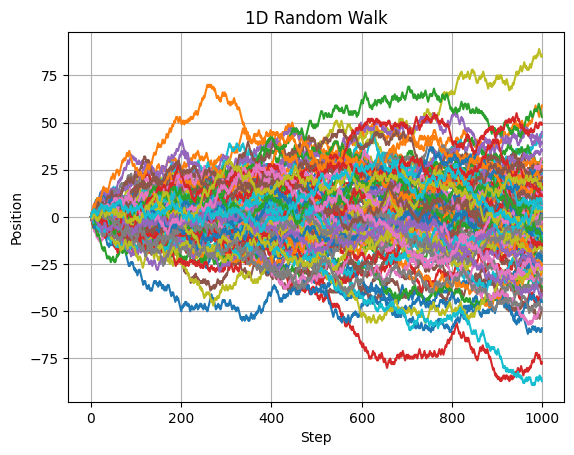

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_1D(N, num_steps):
    """
    Simulate a 1D random walk.

    Parameters
    ----------
    N : int
        Number of walkers - Note: walkers do NOT interact
    num_steps : int
        Number of steps in the walk.

    Returns
    -------
    walks : np.ndarray
        An array of shape (num_steps, N) containing the positions of the walkers at each step.
    """

    # Initialize array to hold walk data
    walks = np.zeros((num_steps, N))

    # Simulate walk
    for i in range(1, num_steps):
        # At each step, decide whether to step left or right
        steps = np.random.choice([-1, 1], size=N)
        # Update the current position from the previous one
        walks[i, :] = walks[i - 1, :] + steps
    return walks


# Number of walkers and steps
N = 100
num_steps = 1000

# Run the simulation
walks = random_walk_1D(N, num_steps)

# Plot the results
for i in range(N):
    plt.plot(walks[:, i]) #, label=f'Walker {i+1}')

plt.xlabel('Step')
plt.ylabel('Position')
plt.title('1D Random Walk')
plt.grid(True)
plt.show()


# 2 - 2D walker

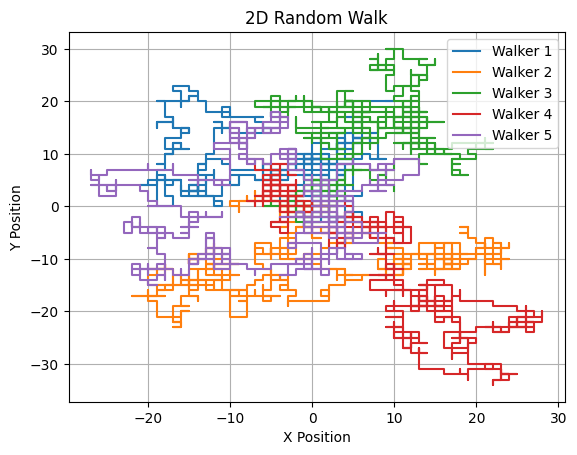

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_2D(N, num_steps):
    """
    Simulate a 2D random walk.

    Parameters
    ----------
    N : int
        Number of walkers.
    num_steps : int
        Number of steps in the walk.

    Returns
    -------
    walks : np.ndarray
        An array of shape (num_steps, N, 2) containing the positions of the walkers at each step.
    """

    # Define the possible steps
    steps = np.array([(-1, 0), (1, 0), (0, -1), (0, 1)])

    # Write your own code
    walks = np.zeros((num_steps, N,2))
    for i in range(1, num_steps):
        # At each step, decide whether to step left or right
        step = steps[np.random.choice(4, size=N)]
        # Update the current position from the previous one
        walks[i, :, :] = walks[i - 1, :, :] + step
    return walks
# Number of walkers and steps
N = 5
num_steps = 1000

# Run the simulation
walks = random_walk_2D(N, num_steps)

# Plot the results
for i in range(N):
    plt.plot(walks[:, i, 0], walks[:, i, 1], label=f'Walker {i+1}')

# Plot the result
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Random Walk')
plt.legend()
plt.grid(True)
plt.show()


# 3 - 2D self-avoiding walker

Requested steps: 1000, Actual steps: 64


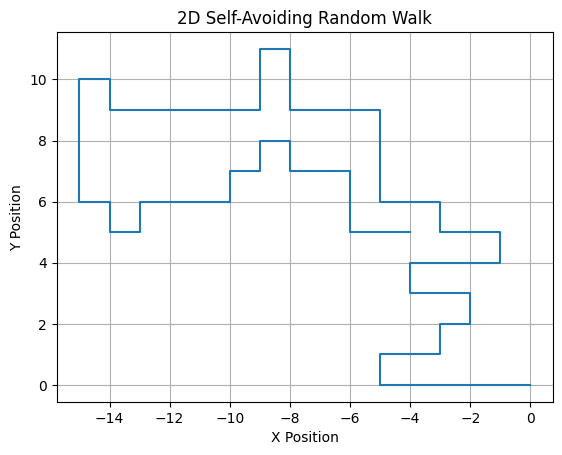

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def self_avoiding_walk_2D(num_steps):
    """
    Simulate a 2D self-avoiding random walk.

    Parameters
    ----------
    num_steps : int
        Number of steps in the walk.

    Returns
    -------
    walk : np.ndarray
        An array of shape (num_steps, 2) containing the positions of the walker at each step.
    actual_steps : int
        Actual number of steps taken in the walk.
    """

    # Define the possible steps
    steps = np.array([(-1, 0), (1, 0), (0, -1), (0, 1)])

    # Initialize array to hold walk data
    walk = np.zeros((num_steps, 2))

    # Set to store visited positions
    visited = set()
    visited.add((0, 0))

    for i in range(1, num_steps):
        valid_steps = []

        for step in steps:
            new_pos = tuple(walk[i-1] + step)
            if new_pos not in visited:
                valid_steps.append(step)

        if valid_steps:
            chosen_step = valid_steps[np.random.randint(len(valid_steps))]
            walk[i] = walk[i-1] + chosen_step
            visited.add(tuple(walk[i]))
        else:
            walk = walk[:i]  # End the walk early if no valid steps
            break

    actual_steps = len(walk)
    return walk, actual_steps

# Number of steps
num_steps = 1000

# Run the simulation
walk, actual_steps = self_avoiding_walk_2D(num_steps)

print(f"Requested steps: {num_steps}, Actual steps: {actual_steps}")

# Plot the results
plt.plot(walk[:, 0], walk[:, 1])
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Self-Avoiding Random Walk')
plt.grid(True)
plt.show()
